## 패키지 설치

In [346]:
random_state = 0
Survived = 'Survived'

In [347]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [348]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [349]:
import src.preprocessing.label as label

import importlib

importlib.reload(label)

<module 'src.preprocessing.label' from '/Users/deptno/workspace/kaggle/titanic/src/preprocessing/label.py'>

In [350]:
train = pd.read_csv('train.csv')

In [351]:
train_input, test_input, train_target, test_target = train_test_split(train.drop(Survived, axis=1), train[Survived],
                                                                      test_size=0.2)

In [352]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 598 to 761
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          565 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        161 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [353]:
train_input.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,565.000000,712.000000,712.000000,712.000000
mean,446.747191,2.300562,29.756496,0.546348,0.375000,33.482554
std,255.933960,0.838322,14.538297,1.163480,0.785662,50.637773
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,446.500000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,665.250000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
train_input

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
598,599,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
342,343,2,"Collander, Mr. Erik Gustaf",male,28.00,0,0,248740,13.0000,NaN,S
588,589,3,"Gilinski, Mr. Eliezer",male,22.00,0,0,14973,8.0500,NaN,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
486,487,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.00,1,0,19943,90.0000,C93,S
...,...,...,...,...,...,...,...,...,...,...,...
252,253,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
291,292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.00,1,0,11967,91.0792,B49,C
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
378,379,3,"Betros, Mr. Tannous",male,20.00,0,0,2648,4.0125,NaN,C


In [355]:
cat_features = [
    'Pclass',
    'Sex',
    'Embarked'
]

## feature selection

In [356]:
train_input_v1 = train_input.copy()
test_input_v1 = test_input.copy()

In [357]:
# Label Encoder 적용
train_input_v1,_ = label.apply(train_input_v1, 'Name', lambda prop: f'{prop}Id')
train_input_v1,_ = label.apply(train_input_v1, 'Sex', lambda prop: f'Label_{prop}')
train_input_v1,_ = label.apply(train_input_v1, 'Embarked', lambda prop: f'Label_{prop}')

test_input_v1, _ = label.apply(test_input_v1, 'Name', lambda prop: f'{prop}Id')
test_input_v1, _ = label.apply(test_input_v1, 'Sex', lambda prop: f'Label_{prop}')
test_input_v1, _ = label.apply(test_input_v1, 'Embarked', lambda prop: f'Label_{prop}')

### Name, PassengerId 가 1:1 관계인지 확인
- Drop `Name`. If `PassengerId` 가 1:1 인 경우 Name
  - label encoding 후에 `drop_duplicates()` 후에 갯수가 같다면 동일한 것으로 간주

In [358]:
print(len(train_input['Name'].unique()))
print(len(train_input['PassengerId'].unique()))

712
712


In [359]:
dropped = train_input_v1[['PassengerId', 'NameId']].drop_duplicates()

In [360]:
# valid they are 1:1 relationship
train_input_v1[['PassengerId', 'NameId']].shape[0] == dropped.shape[0]

True

In [361]:
# ticket, carbin 은 일단 제거
# NameId 는 불필요 하므로 제거
# Sex, Embarked 는 Label* 로 변경되었으므로 제거
train_input_v1.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_input_v1.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [362]:
display(train_input_v1)
display(test_input_v1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Label_Sex,Label_Embarked
598,599,3,NaN,0,0,7.2250,1,0
342,343,2,28.00,0,0,13.0000,1,2
588,589,3,22.00,0,0,8.0500,1,2
413,414,2,NaN,0,0,0.0000,1,2
486,487,1,35.00,1,0,90.0000,0,2
...,...,...,...,...,...,...,...,...
252,253,1,62.00,0,0,26.5500,1,2
291,292,1,19.00,1,0,91.0792,0,0
831,832,2,0.83,1,1,18.7500,1,2
378,379,3,20.00,0,0,4.0125,1,0


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Label_Sex,Label_Embarked
432,433,2,42.0,1,0,26.0000,0,2
399,400,2,28.0,0,0,12.6500,0,2
796,797,1,49.0,0,0,25.9292,0,2
848,849,2,28.0,0,1,33.0000,1,2
276,277,3,45.0,0,0,7.7500,0,2
...,...,...,...,...,...,...,...,...
233,234,3,5.0,4,2,31.3875,0,2
278,279,3,7.0,4,1,29.1250,1,1
114,115,3,17.0,0,0,14.4583,0,0
815,816,1,NaN,0,0,0.0000,1,2


In [363]:
ticket_u = train_input['Ticket'].unique()

## 변수간 correlation 확인

In [364]:
threshold = np.nan

<Axes: >

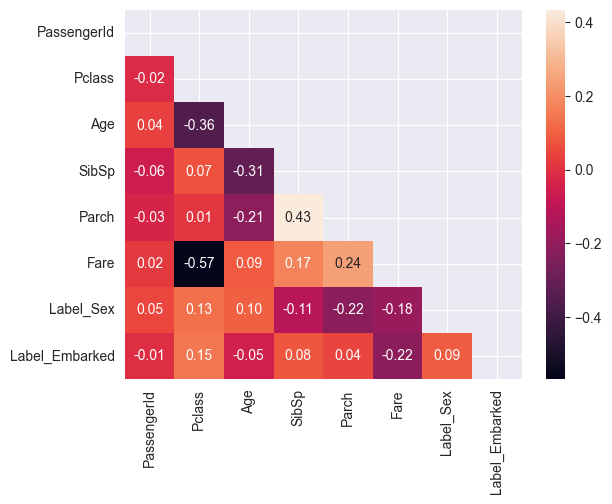

In [365]:
corr_v1 = train_input_v1.corr()
mask = np.triu(np.ones_like(corr_v1, dtype=bool))
mask = mask | (np.abs(corr_v1) < threshold)
display(sns.heatmap(corr_v1, annot=True, mask=mask, fmt='.2f'))

<Axes: >

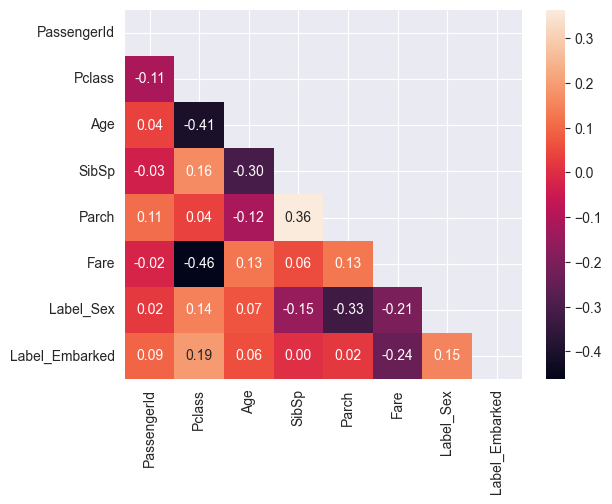

In [366]:
corr_test_v1 = test_input_v1.corr()
mask_test = np.triu(np.ones_like(corr_test_v1, dtype=bool))
mask_test = mask_test | (np.abs(corr_test_v1) < threshold)
display(sns.heatmap(corr_test_v1, annot=True, mask=mask_test, fmt='.2f'))

## 모델 생성

In [367]:
rf = RandomForest = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=8)

In [368]:
rf.fit(train_input_v1, train_target)

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=0)

In [369]:
rf.score(train_input_v1, train_target)

0.9241573033707865

In [370]:
rf.score(test_input_v1, test_target)

0.8324022346368715

## 과대 적합

### max_depth 테스트

In [371]:
score_train_input_v1 = []
score_test_input_v1 = []
get_depth_range = lambda: range(1, 10)
for d in get_depth_range():
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state, max_depth=d)
    rf.fit(train_input_v1, train_target)
    score_train_input_v1.append(rf.score(train_input_v1, train_target))
    score_test_input_v1.append(rf.score(test_input_v1, test_target))


In [372]:
score_v1_df = pd.DataFrame({
    'train': score_train_input_v1,
    'test': score_test_input_v1,
})
display(score_v1_df)

,train,test
0,0.735955,0.743017
1,0.787921,0.826816
2,0.832865,0.815642
3,0.846910,0.843575
4,0.872191,0.854749
5,0.897472,0.854749
6,0.921348,0.843575
7,0.943820,0.854749
8,0.957865,0.837989


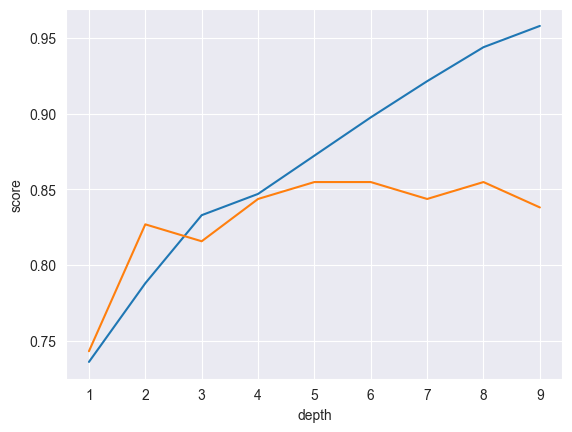

In [373]:
plt.plot(get_depth_range(), score_train_input_v1, label='train')
plt.plot(get_depth_range(), score_test_input_v1, label='test')
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [382]:
## generate output
test = pd.read_csv('test.csv')
print(test.shape)
test, _ = label.apply(test, 'Name', lambda prop: f'{prop}Id')
test, _ = label.apply(test, 'Sex', lambda prop: f'Label_{prop}')
test, _ = label.apply(test, 'Embarked', lambda prop: f'Label_{prop}')
test.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

test_predict = rf.predict(test)

(418, 11)


In [384]:
output_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predict,
})
display(train_input_v1.shape)
display(test_input_v1.shape)
display(test.shape)


(712, 8)

(179, 8)

(418, 8)

In [387]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [390]:
output_df.to_csv('output.csv', index=False)